In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [11]:
df=pd.read_csv('Coca-Cola_stock_history.csv')

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB


In [15]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [17]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04,15311.000000,15311.000000
mean,11.812883,11.906708,11.717375,11.815409,9.139213e+06,0.001678,0.001110
std,15.025726,15.133336,14.915580,15.026316,7.957947e+06,0.021302,0.049148
min,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000
25%,0.238453,0.240305,0.236415,0.238312,2.889600e+06,0.000000,0.000000
50%,4.935146,4.980985,4.884242,4.937339,7.708800e+06,0.000000,0.000000
75%,17.383926,17.612844,17.168283,17.415106,1.307130e+07,0.000000,0.000000
max,66.037933,66.235058,64.776308,65.259270,1.241690e+08,0.440000,3.000000


In [19]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object

In [21]:
df.shape

(15311, 8)

In [25]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15306    False
15307    False
15308    False
15309    False
15310    False
Length: 15311, dtype: bool

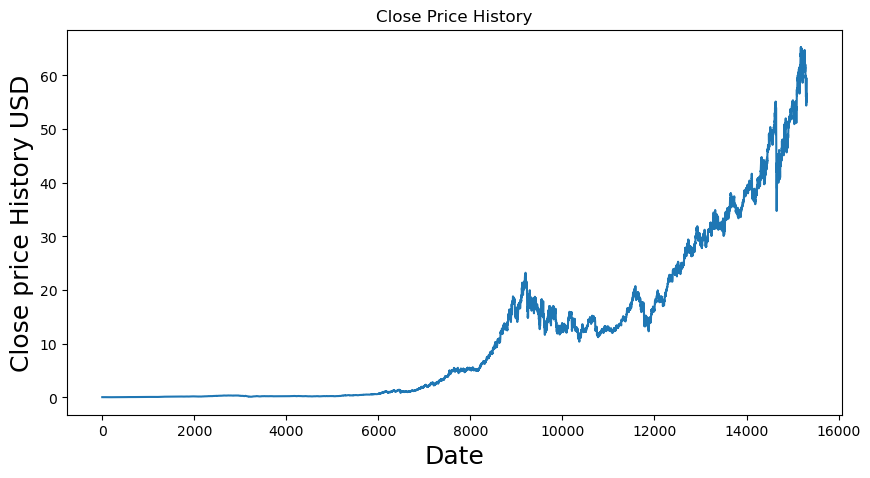

In [29]:
plt.figure(figsize=(10,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price History USD', fontsize=18)
plt.show()

In [33]:
x=df.index.values.reshape(-1, 1)
y=df['Close'].values

In [35]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, shuffle=False)


dtr_model=DecisionTreeRegressor()
dtr_model.fit(x_train, y_train)


DecisionTreeRegressor()

In [37]:
dtr_predictions=dtr_model.predict(x_test)
dtr_rmse=np.sqrt(mean_squared_error(y_test, dtr_predictions))
print('Decision Tree Model RMSE:', dtr_rmse)

Decision Tree Model RMSE: 21.608274306195128


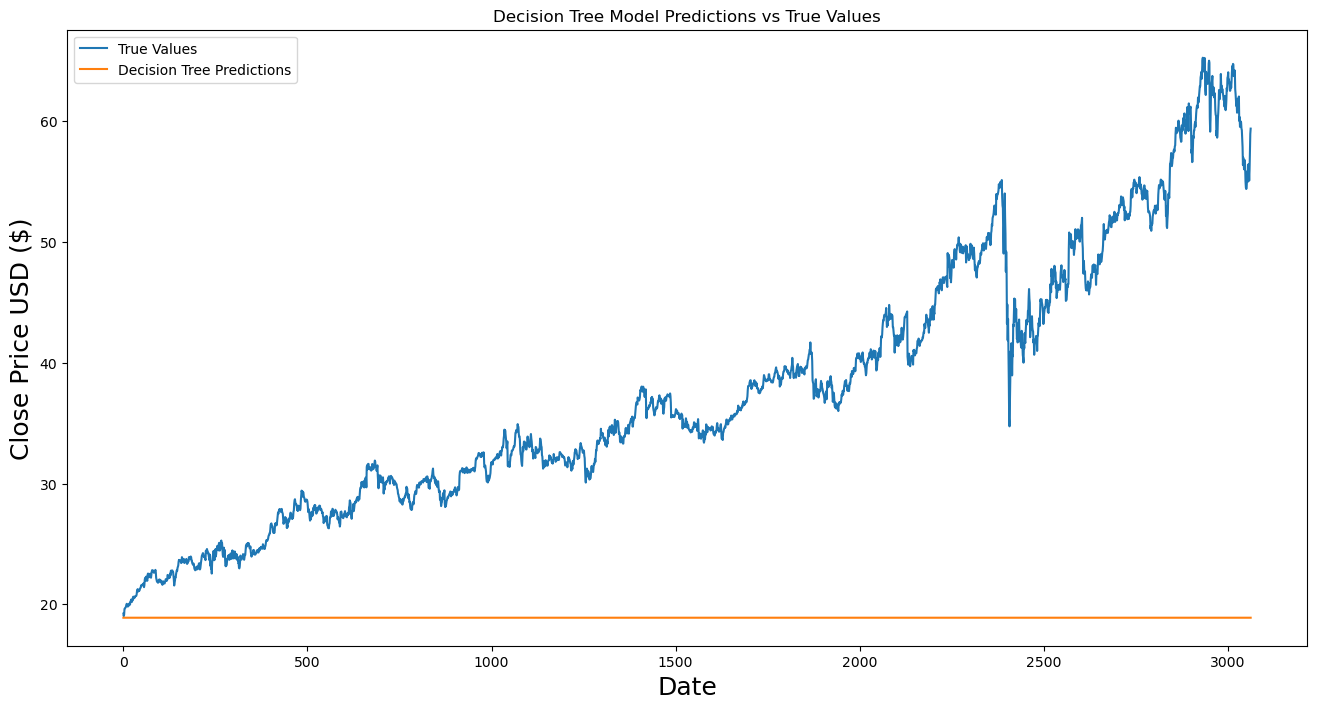

In [39]:
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(dtr_predictions, label='Decision Tree Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

In [41]:
X = data.index.values.reshape(-1, 1)
y = data['Close'].values
     

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training the Random Forest Regressor Model
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, y_train)
     


NameError: name 'data' is not defined